<a href="https://colab.research.google.com/github/Evandeta/Evandeta.github.io/blob/main/Pertemuan_1_Data_Science_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.   Pengumpulan Data
2.   Menelaah Data

# Pengumpulan Data


In [83]:
import pandas as pd
import re
import numpy as np
import itertools

# Load Data


In [84]:
#dir adalah variabel yag digunakan untuk menyimpan data
dir = 'hungarian.data'

**Buatlah Iterasi untuk membaca dataset**

In [85]:
with open(dir, encoding= 'Latin1') as file:
  lines = [line.strip() for line in file]
lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

In [86]:
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i: (i + 10)]).split() for i in range(0, len(lines), 10))
)

df = pd.DataFrame.from_records(data)

df.tail()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
289,1053,0,48,0,0,0,0,-9,2,-9,...,-9,-9,1,1,1,1,1,-9.,-9.,name
290,1054,0,36,1,1,0,0,-9,2,120,...,-9,-9,1,1,1,1,1,-9.,-9.,name
291,5001,0,48,1,0,0,0,-9,3,110,...,-9,-9,1,1,1,1,1,-9.,-9.,name
292,5000,0,47,0,0,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
293,5002,0,53,1,1,1,1,-9,4,130,...,1,1,1,1,1,1,1,-9.,-9.,name


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

In [88]:
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)

In [89]:
df = df.astype(float)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

# Validasi Data

In [91]:
df.replace(-9.0, np.nan, inplace=True)

In [92]:
df.isnull().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

In [93]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

# Menentukan Objek Data

In [95]:
df_selected = df.iloc[:, [1, 2, 3, 8, 10, 14, 17, 30, 36, 38, 39, 42, 49, 56]]

In [96]:
df_selected.head()

,2,3,4,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,1.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,1.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,1.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,1.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,1.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [97]:
df_selected.tail()

,2,3,4,9,11,15,18,31,37,39,40,43,50,57
289,48.0,0.0,0.0,NaN,308.0,0.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,0.0
290,36.0,1.0,1.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,NaN,NaN,NaN,0.0
291,48.0,1.0,0.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,NaN,NaN,6.0,0.0
292,47.0,0.0,0.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,NaN,NaN,0.0
293,53.0,1.0,1.0,130.0,182.0,0.0,0.0,148.0,0.0,0.0,NaN,NaN,NaN,0.0


In [98]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   4       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   39      294 non-null    float64
 10  40      104 non-null    float64
 11  43      4 non-null      float64
 12  50      28 non-null     float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


mengganti nama kolom sesuai dengan 14 nama kolom yang ada pada deskripsi dataset

In [99]:
columns_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'num'
}

df_selected.rename(columns= columns_mapping, inplace=True)

<ipython-input-99-50e1e0d12b8c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns= columns_mapping, inplace=True)


In [100]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   4         294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  num       294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


In [101]:
df_selected.value_counts()

age   sex  4    trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  num
47.0  1.0  1.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0   1.0    1
dtype: int64

In [102]:
df_selected.isnull().sum()

age           0
sex           0
4             0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
num           0
dtype: int64

In [103]:
columns_to_drop = ['ca', 'slope', 'thal']
df_selected = df_selected.drop(columns_to_drop,axis=1)

In [104]:
df_selected.isnull().sum()

age          0
sex          0
4            0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
num          0
dtype: int64

In [105]:
meanTBPS = df_selected['trestbps'].dropna()
meanChol = df_selected['chol'].dropna()
meanFbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['restecg'].dropna()
meanThalach = df_selected['thalach'].dropna()
meanExang = df_selected['exang'].dropna()

In [106]:
meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanFbs = meanFbs.astype(float)
meanThalach = meanThalach.astype(float)
meanExang = meanExang.astype(float)
meanRestCG = meanRestCG.astype(float)

In [107]:
meanTBPS = round(meanTBPS.mean())
meanChol = round(meanChol.mean())
meanFbs = round(meanFbs.mean())
meanThalach = round(meanThalach.mean())
meanExang = round(meanExang.mean())
meanRestCG = round(meanRestCG.mean())

In [108]:
fill_values = {'trestbps' : meanTBPS, 'chol' : meanChol,
               'fbs' : meanFbs, 'thalach' : meanThalach,
               'exang' : meanExang, 'restecg' : meanRestCG}
dfClean = df_selected.fillna(value=fill_values)

In [109]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   4         294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  num       294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [110]:
dfClean.isnull().sum()

age         0
sex         0
4           0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
num         0
dtype: int64

In [111]:
duplicate_rows = dfClean.duplicated()
dfClean[duplicate_rows]

,age,sex,4,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
163,49.0,0.0,1.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [112]:
print("All Duplicate_rows")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate_rows


,age,sex,4,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
90,49.0,0.0,1.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,1.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [113]:
dfClean = dfClean.drop_duplicates()

In [117]:
print("All Duplicate Rows : ")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows : 


,age,sex,4,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num


In [115]:
dfClean.head()

,age,sex,4,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,40.0,1.0,1.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,1.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,1.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,1.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,1.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [118]:
dfClean['num'].value_counts()

0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: num, dtype: int64

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
dfClean.corr()

,age,sex,4,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
age,1.000000,0.014516,0.081092,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.191410,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
4,0.081092,0.191410,1.000000,0.020415,0.029851,-0.021639,-0.109668,-0.182738,0.165186,0.063243,0.115901
trestbps,0.246571,0.082064,0.020415,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.029851,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,-0.021639,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.109668,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.182738,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.165186,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.063243,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


In [129]:
cor_mat = dfClean.corr()

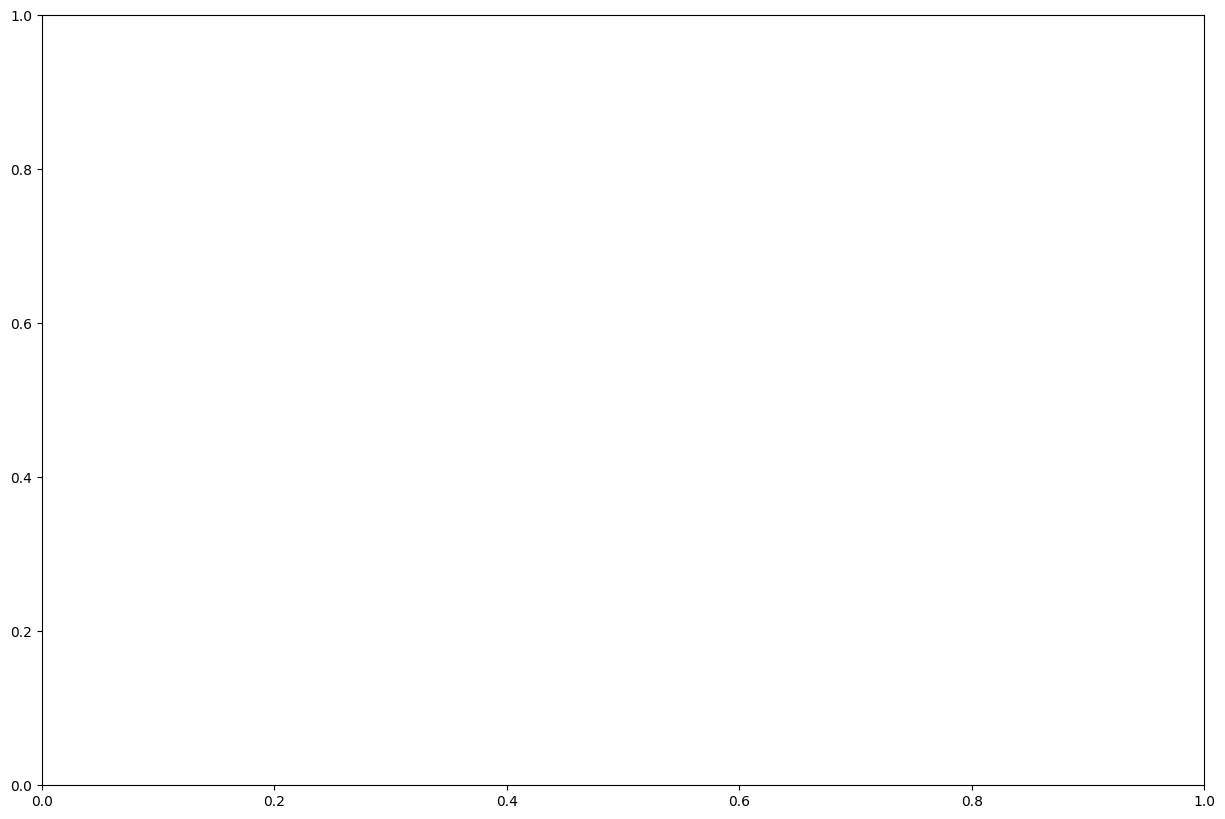

In [130]:
fix,ax = plt.subplots(figsize=(15,10))

<Axes: >

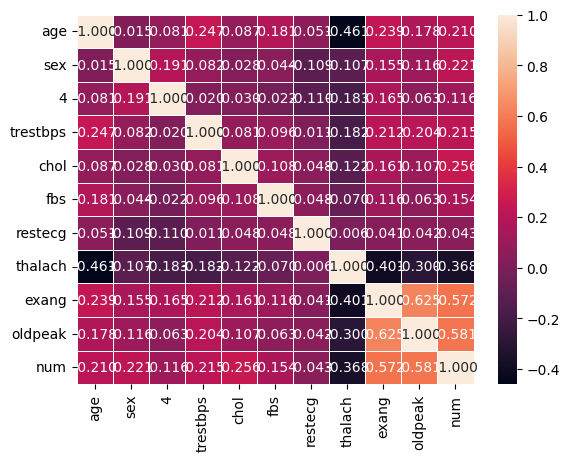

In [134]:
sns.heatmap(cor_mat, annot=True, linewidth=0.5, fmt=" .3f")